# Steps
### 1. Scrape the Data
### 2. Data Cleaning
### 3. Convert your data into DataFrame
### 4. Perform the Data Analysis - Data Cleaning, Data Exploration, Data Manipulation, Data Viosualization
### 5. Perform the EDA (Exploratory Data Analysis)

# Performing the Data Scraping from the WEB
## Link: https://sofifa.com/players

## Q1. Give the logic to print the URL for all the 10 pages

In [1]:
for i in range(0,541,60):
  print(f'https://sofifa.com/players?offset={i}')

# Here we extract the link of the first 10 pages from sofifa.com/players to perform EDA.

https://sofifa.com/players?offset=0
https://sofifa.com/players?offset=60
https://sofifa.com/players?offset=120
https://sofifa.com/players?offset=180
https://sofifa.com/players?offset=240
https://sofifa.com/players?offset=300
https://sofifa.com/players?offset=360
https://sofifa.com/players?offset=420
https://sofifa.com/players?offset=480
https://sofifa.com/players?offset=540


# Begining 

In [2]:
# Import all the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import re #RegEx
from bs4 import BeautifulSoup # Will be used for web scrapping
import requests # requests will allow you to send HTTP/1.1 requests using Python.

In [3]:
url = 'https://sofifa.com/players?offset=0'
# Here we take the URl of the first page of sofifa to check if we can scrape the data or not

In [4]:
req = requests.get(url)
# here get() method sends a GET request to the specified url.

In [5]:
req.status_code
# Status code 200 means the site is up and running

200

In [6]:
soup = BeautifulSoup(req.content) # The variable soup now holds the contents of the page in the form of a string

In [7]:
soup.prettify() # Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document

'<!DOCTYPE html>\n<html lang="en-US">\n <head id="head">\n  <title>\n   Players FIFA 23 Nov 16, 2022 SoFIFA\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>\n  <meta content="FIFA 23 player ratings on Nov 16, 2022" name="description"/>\n  <meta content="Khachin Borjigin" name="author"/>\n  <meta content="2009 - 2022 SoFIFA.com" name="copyright"/>\n  <meta content="light" name="twitter:widgets:theme"/>\n  <meta content="#e6e6e6" name="twitter:widgets:border-color"/>\n  <link href="/launcher-icon.png" rel="shortcut icon"/>\n  <link href="/launcher-icon.png" rel="apple-touch-icon"/>\n  <script>\n   window.ramp = window.ramp || {};window.ramp.que = window.ramp.que || [];\n  </script>\n  <link href="https://sofifa.com/players?hl=en-US" hreflang="en" rel="alternate"/>\n  <link href="https://sofifa.com/players?hl=fr-FR" hreflang="fr" r

In [8]:
arr = [i for i in soup.findAll('tr')] # Puts all individual <tr></tr> tags in an array 

In [9]:
arr[0]

<tr class="persist-header">
<th class="col-avatar"></th>
<th class="col-name text-left">Name</th><th aria-label="Age" class="col col-ae" data-tip-pos="top" role="tooltip"><a class="pjax ellipsis" href="/players?col=ae&amp;sort=asc" rel="nofollow"><span class="bp3-icon sorter"></span>Age</a></th><th aria-label="Overall Rating" class="col col-oa" data-tip-pos="top" role="tooltip"><a class="pjax ellipsis" href="/players?col=oa&amp;sort=desc" rel="nofollow"><span class="bp3-icon sorter"></span>OVA</a></th><th aria-label="Potential" class="col col-pt" data-tip-pos="top" role="tooltip"><a class="pjax ellipsis" href="/players?col=pt&amp;sort=desc" rel="nofollow"><span class="bp3-icon sorter"></span>POT</a></th><th aria-label="Team &amp; Contract" class="col-name text-left" data-tip-pos="top" role="tooltip"><a class="pjax ellipsis" href="/players?col=tm&amp;sort=asc" rel="nofollow"><span class="bp3-icon sorter"></span>Team &amp; Contract</a></th>
<th aria-label="Value" class="col col-vl" data-

In [10]:
del arr[0]

In [11]:
arr[0]

<tr>
<td class="col-avatar" data-balloon="Click here!" data-balloon-pos="up" data-balloon-visible=""><figure class="avatar">
<img alt="" class="player-check" data-root="https://cdn.sofifa.net/players/" data-src="https://cdn.sofifa.net/players/210/411/23_60.png" data-srcset="https://cdn.sofifa.net/players/210/411/23_120.png 2x, https://cdn.sofifa.net/players/210/411/23_180.png 3x" data-type="player" id="210411" src="https://cdn.sofifa.net/players/notfound_0_60.png"/></figure></td>
<td class="col-name">
<a aria-label="Otávio Edmilson da Silva Monteiro" data-tip-pos="top" href="/player/210411/otavio-edmilson-da-silva-monteiro/230006/" role="tooltip"><div class="ellipsis">Otávio</div></a><img alt="" class="flag" data-src="https://cdn.sofifa.net/flags/pt.png" data-srcset="https://cdn.sofifa.net/flags/pt@2x.png 2x, https://cdn.sofifa.net/flags/pt@3x.png 3x" height="16" src="https://cdn.sofifa.net/pixel.gif" title="Portugal" width="21"/> <a href="/players?pn=12" rel="nofollow"><span class="po

In [12]:
# using RegEx to extract the image link for each player
re.sub('^<img.*data-srcset="| .*/>', '' , str(arr[0].find('img',{"class": "player-check"})))

'https://cdn.sofifa.net/players/210/411/23_120.png'

### A good way to navigate through the data and see what information lies where, we can go to website and use devtools to see in which particular tag what data lies

In [16]:
arr[0].find('div', {"class":"ellipsis"})

<div class="ellipsis">Otávio</div>

In [17]:
# Extracting Name using RegEx
re.sub('^<.*">|<.*>', '', str(arr[0].find('div', {"class":"ellipsis"})))

'Otávio'

In [18]:
str(arr[0].find('td', {"class":"col-ae"}))

'<td class="col col-ae" data-col="ae">27</td>'

In [19]:
# Age
re.sub('^<td.*">|</td>', '', str(arr[0].find('td', {"class":"col"})))

'27'

In [20]:
# OVA
re.sub('^<td.*">|<.*>', '', str(arr[0].find('td', {"class":"col col-oa"})))

'82'

In [21]:
# POT
re.sub('^<td.*">|<.*>', '', str(arr[0].find('td', {"class":"col col-pt"})))

'82'

In [22]:
# Team
re.sub('<a.*">|<.*>', '', str(arr[0].findAll('a')[-1]))

'Porto'

In [23]:
# Duration
re.sub('<div.*\n|<.*>', '', str(arr[0].find('div', {"class": "sub"})))

'2014 ~ 2025'

In [24]:
# Value
re.sub('^<td.*">€|<.*>', '', str(arr[0].find('td', {"class": "col col-vl"})))

'32.5M'

In [25]:
# Wage
re.sub('^<td.*">€|<.*>', '', str(arr[0].find('td', {"class": "col col-wg"})))

'21K'

In [26]:
# Total Stats
re.sub('^<td.*">|<.*>', '', str(arr[0].find('td', {"class": "col col-tt"})))

'2123'

## Making Columns to scrape the data and store it in a dataset

In [27]:
columns = ['IMAGE_LINK', 'NAME', 'AGE', 'OVA', 'POT', 'TEAM','DURATION', 'VALUE', 'WAGE', 'TOTAL_STATS']

In [31]:
fifa_final = pd.DataFrame()

for i in range(0,541,60):
  url = f'https://sofifa.com/players?offset={i}'
  req = requests.get(url)
  if req.status_code == 200:
    soup = BeautifulSoup(req.content)
    lists = [[] for _ in range(10)]

    for i in soup.findAll('tr'):
      Image_Link = re.sub('^<img.*data-srcset="| .*/>', '' , str(i.find('img',{"class": "player-check"})))
      Name = re.sub('^<a.*">|<.*>', '', str(i.find('a', {"role":"tooltip"})))
      Age = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class":"col"})))
      OVA = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class":"col col-oa"})))
      POT = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class":"col col-pt"})))
      Team = re.sub('<a.*">|<.*>', '', str(i.findAll('a')[-1]))
      Duration = re.sub('<div.*\n|<.*>', '', str(i.find('div', {"class": "sub"})))
      Value = re.sub('^<td.*">€|<.*>', '', str(i.find('td', {"class": "col col-vl"})))
      Wage = re.sub('^<td.*">€|<.*>', '', str(i.find('td', {"class": "col col-wg"})))
      Total_stats = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class": "col col-tt"})))


      lists[0].append(Image_Link)
      lists[1].append(Name)
      lists[2].append(Age)
      lists[3].append(OVA)
      lists[4].append(POT)
      lists[5].append(Team)
      lists[6].append(Duration)
      lists[7].append(Value)
      lists[8].append(Wage)
      lists[9].append(Total_stats)


  fifa = pd.DataFrame({"Image_link":lists[0],
                      "Name": lists[1],
                      "Age": lists[2],
                      "OVA": lists[3],
                      "POT": lists[4],
                      "Team": lists[5],
                      "Duration": lists[6],
                      "Value": lists[7],
                      "Wage": lists[8],
                      "Total_stats": lists[9]})

  fifa.drop(0, inplace=True)

  fifa['Age'] = pd.to_numeric(fifa['Age'])
  fifa['OVA'] = pd.to_numeric(fifa['OVA'])
  fifa['POT'] = pd.to_numeric(fifa['POT'])
  fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])

  fifa_final = pd.concat([fifa_final,fifa], ignore_index=True)

In [32]:
fifa_final.head()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,https://cdn.sofifa.net/players/210/411/23_120.png,Otávio,27,82,82,Porto,2014 ~ 2025,32.5M,21K,2123
1,https://cdn.sofifa.net/players/216/201/23_120.png,Iñaki Williams,28,81,81,Athletic Club,2012 ~ 2028,26.5M,40K,2055
2,https://cdn.sofifa.net/players/245/155/23_120.png,M. Kudus,21,77,85,Ajax,2020 ~ 2025,23.5M,13K,2032
3,https://cdn.sofifa.net/players/229/956/23_120.png,L. Zigi,25,71,76,St. Gallen,2020 ~ 2025,2.2M,6K,1186
4,https://cdn.sofifa.net/players/020/801/23_120.png,Cristiano Ronaldo,37,90,90,Manchester United,2021 ~ 2023,41M,220K,2147


In [33]:
fifa_final.tail(10)

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
590,https://cdn.sofifa.net/players/256/780/23_120.png,M. Dárdai,20,71,82,Hertha BSC,2020 ~ 2025,3.8M,12K,1692
591,https://cdn.sofifa.net/players/256/942/23_120.png,E. Martel,20,67,84,FC Köln,2022 ~ 2026,2.5M,6K,1706
592,https://cdn.sofifa.net/players/257/540/23_120.png,A. Knauff,20,75,83,Eintracht Frankfurt,"Jun 30, 2023",12.5M,27K,1844
593,https://cdn.sofifa.net/players/257/899/23_120.png,K. Fujimoto,23,74,83,Gil Vicente,2020 ~ 2025,9.5M,10K,1894
594,https://cdn.sofifa.net/players/259/159/23_120.png,J. Che,18,66,82,TSG Hoffenheim,"Jun 30, 2023",2.1M,700,1574
595,https://cdn.sofifa.net/players/260/145/23_120.png,O. Hutchinson,18,64,81,Chelsea,2022 ~ 2025,1.5M,7K,1625
596,https://cdn.sofifa.net/players/261/417/23_120.png,K. Mier,22,72,84,Atlético Nacional,2019 ~ 2025,5M,3K,1096
597,https://cdn.sofifa.net/players/268/837/23_120.png,Rodrigo Ribeiro,17,66,84,Sporting CP,2022 ~ 2024,2.1M,850,1533
598,https://cdn.sofifa.net/players/270/107/23_120.png,L. Langoni,19,69,81,Boca Juniors,2022 ~ 2026,3.3M,5K,1644
599,https://cdn.sofifa.net/players/270/901/23_120.png,L. Ulrich,17,60,83,VfB Stuttgart,2022 ~ 2026,775K,500,1697


In [34]:
fifa_final.columns # All the columns of the fifa dataset

Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value',
       'Wage', 'Total_stats'],
      dtype='object')

In [35]:
len(fifa_final) # Number of entries in the final dataset

600

In [36]:
len(fifa_final.columns) # Total Columns in the final dataset

10

In [37]:
fifa_final.info() # Some general info about our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image_link   600 non-null    object
 1   Name         600 non-null    object
 2   Age          600 non-null    int64 
 3   OVA          600 non-null    int64 
 4   POT          600 non-null    int64 
 5   Team         600 non-null    object
 6   Duration     600 non-null    object
 7   Value        600 non-null    object
 8   Wage         600 non-null    object
 9   Total_stats  600 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 47.0+ KB


In [38]:
fifa_final.describe() # Some statistical information about our dataset

,Age,OVA,POT,Total_stats
count,600.000000,600.000000,600.000000,600.000000
mean,23.883333,77.551667,83.693333,1900.325000
std,4.387688,6.130522,4.031920,236.919256
min,16.000000,58.000000,69.000000,919.000000
25%,21.000000,74.000000,82.000000,1796.750000
50%,23.000000,78.000000,84.000000,1940.000000
75%,26.000000,82.000000,86.000000,2060.000000
max,40.000000,91.000000,95.000000,2312.000000


# From here on we check for impurties in our dataset and correct them

In [39]:
# How many null values are there in each column?
fifa_final.isna().sum()

Image_link     0
Name           0
Age            0
OVA            0
POT            0
Team           0
Duration       0
Value          0
Wage           0
Total_stats    0
dtype: int64

In [40]:
# How many null values are there in a dataset?
fifa_final.isna().sum().sum()

0

In [41]:
# Check for the Duplicate values?
fifa_final.duplicated().sum()

18

In [42]:
fifa_final.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [43]:
# Show all duplicated values
fifa_final[fifa_final.duplicated()]

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
120,https://cdn.sofifa.net/players/173/909/23_120.png,K. Boateng,35,74,74,Hertha BSC,2021 ~ 2023,1.7M,19K,2007
181,https://cdn.sofifa.net/players/212/228/23_120.png,I. Toney,26,78,80,Brentford,2020 ~ 2025,17.5M,55K,2039
252,https://cdn.sofifa.net/players/243/057/23_120.png,N. Williams,21,72,82,Nottingham Forest,2022 ~ 2026,5M,25K,1804
313,https://cdn.sofifa.net/players/235/410/23_120.png,Y. En-Nesyri,25,80,84,Sevilla,2020 ~ 2025,29.5M,35K,1881
419,https://cdn.sofifa.net/players/257/876/23_120.png,N. Seiwald,21,75,84,Salzburg,2020 ~ 2026,12.5M,19K,2016
450,https://cdn.sofifa.net/players/240/787/23_120.png,H. Traorè,22,77,86,Sassuolo,2021 ~ 2024,23.5M,29K,2005
454,https://cdn.sofifa.net/players/242/879/23_120.png,M. Vandevoordt,20,71,83,Genk,2018 ~ 2023,4M,5K,1068
463,https://cdn.sofifa.net/players/247/851/23_120.png,Bruno Guimarães,24,82,87,Newcastle United,2022 ~ 2026,46M,95K,2127
464,https://cdn.sofifa.net/players/253/969/23_120.png,L. Hjelde,18,65,82,Leeds United,2021 ~ 2025,1.7M,2K,1529
481,https://cdn.sofifa.net/players/188/337/23_120.png,M. Wakaso,31,72,72,AS Eupen,"Jun 30, 2023",1.9M,10K,2115


In [44]:
# Delete all the duplicated values
fifa_final.drop_duplicates(inplace=True)

In [45]:
# Checking if duplicate values still exist
fifa_final[fifa_final.duplicated()]

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats


In [46]:
fifa_final.duplicated().sum()

0

In [47]:
# The final dataset shape after removing duplicates
fifa_final.shape

(582, 10)

In [48]:
# Here we notice that even thought the duplicates values are gone, the dataset hasnt been re-indexed
fifa_final.tail()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
595,https://cdn.sofifa.net/players/260/145/23_120.png,O. Hutchinson,18,64,81,Chelsea,2022 ~ 2025,1.5M,7K,1625
596,https://cdn.sofifa.net/players/261/417/23_120.png,K. Mier,22,72,84,Atlético Nacional,2019 ~ 2025,5M,3K,1096
597,https://cdn.sofifa.net/players/268/837/23_120.png,Rodrigo Ribeiro,17,66,84,Sporting CP,2022 ~ 2024,2.1M,850,1533
598,https://cdn.sofifa.net/players/270/107/23_120.png,L. Langoni,19,69,81,Boca Juniors,2022 ~ 2026,3.3M,5K,1644
599,https://cdn.sofifa.net/players/270/901/23_120.png,L. Ulrich,17,60,83,VfB Stuttgart,2022 ~ 2026,775K,500,1697


In [49]:
# Re-indexing the dataset
fifa_final.reset_index(inplace=True)

In [50]:
fifa_final.tail()

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
577,595,https://cdn.sofifa.net/players/260/145/23_120.png,O. Hutchinson,18,64,81,Chelsea,2022 ~ 2025,1.5M,7K,1625
578,596,https://cdn.sofifa.net/players/261/417/23_120.png,K. Mier,22,72,84,Atlético Nacional,2019 ~ 2025,5M,3K,1096
579,597,https://cdn.sofifa.net/players/268/837/23_120.png,Rodrigo Ribeiro,17,66,84,Sporting CP,2022 ~ 2024,2.1M,850,1533
580,598,https://cdn.sofifa.net/players/270/107/23_120.png,L. Langoni,19,69,81,Boca Juniors,2022 ~ 2026,3.3M,5K,1644
581,599,https://cdn.sofifa.net/players/270/901/23_120.png,L. Ulrich,17,60,83,VfB Stuttgart,2022 ~ 2026,775K,500,1697


In [51]:
fifa_final.head()
# here we notice that we have an unnecesary column for index, despite already having an index which is assigned by pandas itself

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,0,https://cdn.sofifa.net/players/210/411/23_120.png,Otávio,27,82,82,Porto,2014 ~ 2025,32.5M,21K,2123
1,1,https://cdn.sofifa.net/players/216/201/23_120.png,Iñaki Williams,28,81,81,Athletic Club,2012 ~ 2028,26.5M,40K,2055
2,2,https://cdn.sofifa.net/players/245/155/23_120.png,M. Kudus,21,77,85,Ajax,2020 ~ 2025,23.5M,13K,2032
3,3,https://cdn.sofifa.net/players/229/956/23_120.png,L. Zigi,25,71,76,St. Gallen,2020 ~ 2025,2.2M,6K,1186
4,4,https://cdn.sofifa.net/players/020/801/23_120.png,Cristiano Ronaldo,37,90,90,Manchester United,2021 ~ 2023,41M,220K,2147


In [52]:
# Delete the column - index
fifa_final.drop(['index'], axis=1, inplace=True)

In [53]:
fifa_final.head()
# Hence, we dont have the index columns anymore 

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,https://cdn.sofifa.net/players/210/411/23_120.png,Otávio,27,82,82,Porto,2014 ~ 2025,32.5M,21K,2123
1,https://cdn.sofifa.net/players/216/201/23_120.png,Iñaki Williams,28,81,81,Athletic Club,2012 ~ 2028,26.5M,40K,2055
2,https://cdn.sofifa.net/players/245/155/23_120.png,M. Kudus,21,77,85,Ajax,2020 ~ 2025,23.5M,13K,2032
3,https://cdn.sofifa.net/players/229/956/23_120.png,L. Zigi,25,71,76,St. Gallen,2020 ~ 2025,2.2M,6K,1186
4,https://cdn.sofifa.net/players/020/801/23_120.png,Cristiano Ronaldo,37,90,90,Manchester United,2021 ~ 2023,41M,220K,2147


# Performing EDA (Exploratory Data Analysis)

### 1)Find all the (name) Player who is having the highest wage.

In [54]:
fifa_highsalary_players = fifa_final.copy()

In [55]:
df = fifa_highsalary_players['Wage'].str.replace(r'\D+', '', regex=True)

In [56]:
df

0       21
1       40
2       13
3        6
4      220
      ... 
577      7
578      3
579    850
580      5
581    500
Name: Wage, Length: 582, dtype: object

In [57]:
fifa_highsalary_players['Temp Wage'] = df

In [58]:
fifa_highsalary_players.head()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats,Temp Wage
0,https://cdn.sofifa.net/players/210/411/23_120.png,Otávio,27,82,82,Porto,2014 ~ 2025,32.5M,21K,2123,21
1,https://cdn.sofifa.net/players/216/201/23_120.png,Iñaki Williams,28,81,81,Athletic Club,2012 ~ 2028,26.5M,40K,2055,40
2,https://cdn.sofifa.net/players/245/155/23_120.png,M. Kudus,21,77,85,Ajax,2020 ~ 2025,23.5M,13K,2032,13
3,https://cdn.sofifa.net/players/229/956/23_120.png,L. Zigi,25,71,76,St. Gallen,2020 ~ 2025,2.2M,6K,1186,6
4,https://cdn.sofifa.net/players/020/801/23_120.png,Cristiano Ronaldo,37,90,90,Manchester United,2021 ~ 2023,41M,220K,2147,220


In [59]:
fifa_highsalary_players['Temp Wage'] = fifa_highsalary_players['Temp Wage'].astype(str).astype(int)

In [60]:
fifa_highsalary_players.sort_values(by='Temp Wage', ascending = False, inplace= True)

In [61]:
fifa_highsalary_players.head()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats,Temp Wage
412,https://cdn.sofifa.net/players/252/064/23_120.png,L. Krejčí,23,76,84,Sparta Praha,2019 ~ 2025,15.5M,900,1972,900
579,https://cdn.sofifa.net/players/268/837/23_120.png,Rodrigo Ribeiro,17,66,84,Sporting CP,2022 ~ 2024,2.1M,850,1533,850
57,https://cdn.sofifa.net/players/223/690/23_120.png,S. Rochet,29,78,80,Nacional,2019 ~ 2023,11.5M,850,1211,850
354,https://cdn.sofifa.net/players/263/514/23_120.png,A. Kamara,17,60,82,Borussia Dortmund,2021 ~ 2026,775K,800,1645,800
159,https://cdn.sofifa.net/players/246/340/23_120.png,M. Mudryk,21,75,85,Shakhtar Donetsk,2018 ~ 2026,12.5M,750,1823,750


In [62]:
fifa_highsalary_players.drop(['Image_link', 'OVA', 'POT','Team','Duration','Value','Total_stats','Temp Wage'], axis=1, inplace=True)

In [63]:
fifa_highsalary_players.reset_index(inplace=True)

In [64]:
fifa_highsalary_players.drop(['index'], axis=1, inplace=True)

In [65]:
fifa_highsalary_players.head(50)

,Name,Age,Wage
0,L. Krejčí,23,900
1,Rodrigo Ribeiro,17,850
2,S. Rochet,29,850
3,A. Kamara,17,800
4,M. Mudryk,21,750
5,J. Che,18,700
6,J. Bellingham,16,700
7,R. Ofori,28,600
8,Diego Moreira,17,600
9,T. Rothe,17,500


### 2)List out the Top 10 Players according to their POT

In [66]:
fifa_top_pot = fifa_final.copy()

In [67]:
fifa_top_pot.sort_values(by='POT', ascending = False, inplace= True)

In [68]:
fifa_top_pot.reset_index(inplace=True)

In [69]:
fifa_top_pot.head()

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,62,https://cdn.sofifa.net/players/231/747/23_120.png,K. Mbappé,23,91,95,Paris Saint Germain,2018 ~ 2024,190.5M,230K,2177
1,69,https://cdn.sofifa.net/players/239/085/23_120.png,E. Haaland,21,89,94,Manchester City,2022 ~ 2027,160M,230K,2123
2,195,https://cdn.sofifa.net/players/230/621/23_120.png,G. Donnarumma,23,88,92,Paris Saint Germain,2021 ~ 2026,103.5M,110K,1375
3,106,https://cdn.sofifa.net/players/251/854/23_120.png,Pedri,19,85,92,FC Barcelona,2020 ~ 2026,104.5M,115K,2112
4,254,https://cdn.sofifa.net/players/228/702/23_120.png,F. de Jong,25,87,92,FC Barcelona,2019 ~ 2026,116.5M,230K,2238


In [70]:
fifa_top_pot.drop(['Image_link', 'OVA', 'Age','Team','Duration','Value','Total_stats','Wage','index'], axis=1, inplace=True)

In [71]:
fifa_top_pot.head(10)

,Name,POT
0,K. Mbappé,95
1,E. Haaland,94
2,G. Donnarumma,92
3,Pedri,92
4,F. de Jong,92
5,P. Foden,92
6,Vinícius Jr.,92
7,T. Courtois,91
8,R. Lewandowski,91
9,D. Vlahović,91


### 3)Find out all the Youngest Players

In [72]:
fifa_young_players = fifa_final.copy()

In [73]:
fifa_young_players.sort_values(by='Age', ascending = True, inplace= True)

In [74]:
fifa_young_players.reset_index(inplace=True)

In [75]:
fifa_young_players.head()

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,281,https://cdn.sofifa.net/players/270/964/23_120.png,J. Bellingham,16,58,81,Birmingham City,2022 ~ 2025,625K,700,1570
1,581,https://cdn.sofifa.net/players/270/901/23_120.png,L. Ulrich,17,60,83,VfB Stuttgart,2022 ~ 2026,775K,500,1697
2,208,https://cdn.sofifa.net/players/264/309/23_120.png,A. Güler,17,69,86,Fenerbahçe,2021 ~ 2025,3.5M,3K,1772
3,41,https://cdn.sofifa.net/players/262/863/23_120.png,A. Nusa,17,68,88,Club Brugge,2021 ~ 2025,3.3M,2K,1684
4,43,https://cdn.sofifa.net/players/240/833/23_120.png,Y. Moukoko,17,71,89,Borussia Dortmund,2020 ~ 2023,4.7M,6K,1754


In [76]:
fifa_young_players.drop(['Image_link', 'OVA', 'POT','Team','Duration','Value','Total_stats','Wage','index'], axis=1, inplace=True)

In [77]:
fifa_young_players

,Name,Age
0,J. Bellingham,16
1,L. Ulrich,17
2,A. Güler,17
3,A. Nusa,17
4,Y. Moukoko,17
...,...,...
577,F. Muslera,36
578,Thiago Silva,37
579,Cristiano Ronaldo,37
580,Pepe,39


### 4)Find out all the Oldest Players

In [78]:
fifa_old_players = fifa_final.copy()

In [79]:
fifa_old_players.sort_values(by='Age', ascending = False, inplace= True)

In [80]:
fifa_old_players.reset_index(inplace=True)

In [81]:
fifa_old_players.head()

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,120,https://cdn.sofifa.net/players/041/236/23_120.png,Z. Ibrahimović,40,82,82,Milan,2020 ~ 2023,0,63K,1967
1,88,https://cdn.sofifa.net/players/120/533/23_120.png,Pepe,39,81,81,Porto,2019 ~ 2023,4.6M,12K,1883
2,471,https://cdn.sofifa.net/players/164/240/23_120.png,Thiago Silva,37,86,86,Chelsea,2020 ~ 2023,12M,115K,2012
3,4,https://cdn.sofifa.net/players/020/801/23_120.png,Cristiano Ronaldo,37,90,90,Manchester United,2021 ~ 2023,41M,220K,2147
4,356,https://cdn.sofifa.net/players/155/862/23_120.png,Sergio Ramos,36,84,84,Paris Saint Germain,2021 ~ 2023,7.5M,75K,2137


In [82]:
fifa_old_players.drop(['Image_link', 'OVA', 'POT','Team','Duration','Value','Total_stats','Wage','index'], axis=1, inplace=True)

In [83]:
fifa_old_players

,Name,Age
0,Z. Ibrahimović,40
1,Pepe,39
2,Thiago Silva,37
3,Cristiano Ronaldo,37
4,Sergio Ramos,36
...,...,...
577,A. Güler,17
578,Iker Bravo,17
579,M. Tel,17
580,L. Ulrich,17


### 5)Plot a graph - First 10 player's Name Vs Player's POT

<AxesSubplot: xlabel='Name'>

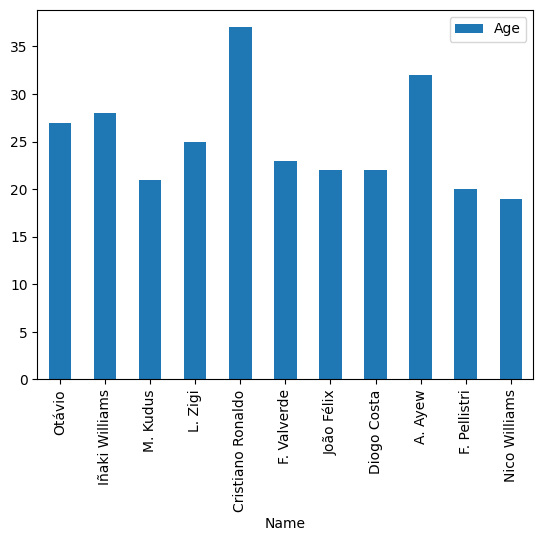

In [84]:
fifa_first_ten = fifa_final.copy()
fifa_first_ten=fifa_first_ten.drop(df.index[11:])
fifa_first_ten.plot(x="Name", y="Age", kind="bar")

### 6)Plot a graph - First 10 player's Name Vs Player's Wage

In [85]:
fifa_first_ten = fifa_final.copy()

In [86]:
df = fifa_first_ten['Wage'].str.replace(r'\D+', '', regex=True)

In [87]:
fifa_first_ten['Temp Wage'] = df

In [88]:
fifa_first_ten['Temp Wage'] = fifa_first_ten['Temp Wage'].astype(str).astype(int)

In [89]:
fifa_first_ten.sort_values(by='Temp Wage', ascending = False, inplace= True)

In [90]:
fifa_first_ten.reset_index(inplace=True)

In [93]:
fifa_first_ten.drop(['index','Image_link','Age','POT','OVA','Team','Duration','Value','Total_stats'], axis=1, inplace=True)

In [94]:
fifa_first_ten

,Name,Wage,Temp Wage
0,L. Krejčí,900,900
1,Rodrigo Ribeiro,850,850
2,S. Rochet,850,850
3,A. Kamara,800,800
4,M. Mudryk,750,750
...,...,...,...
577,H. Martín,0,0
578,A. Vega,0,0
579,G. Ochoa,0,0
580,C. Rodríguez,0,0


In [95]:
fifa_first_ten.rename(columns = {'Temp Wage':'Wage'}, inplace = True)

In [96]:
fifa_first_ten=fifa_first_ten.drop(df.index[11:])

<AxesSubplot: xlabel='Name'>

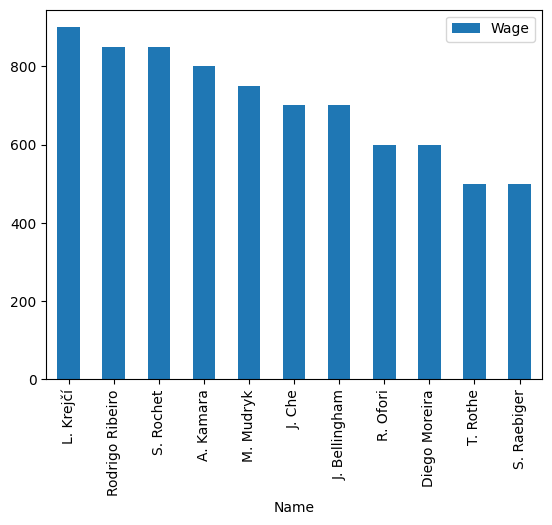

In [97]:
fifa_first_ten.plot(x="Name", y="Wage", kind="bar")

### 7)Find the Player(s) whose potential is more than 90

In [98]:
fifa_highpotential = fifa_final.copy()

In [99]:
fifa_highpotential.loc[fifa_highpotential['POT'] > 90, 'HigherPOT'] = 'True'

In [100]:
fifa_highpotential = fifa_highpotential.dropna()

In [101]:
fifa_highpotential.reset_index(inplace=True)

In [102]:
fifa_highpotential.drop(['index', 'Image_link','HigherPOT','Age','OVA','Team','Wage','Duration','Value','Total_stats'], axis=1, inplace=True)

In [103]:
fifa_highpotential

,Name,POT
0,Rúben Dias,91
1,D. Vlahović,91
2,K. Mbappé,95
3,E. Haaland,94
4,J. Bellingham,91
5,L. Messi,91
6,Pedri,92
7,Vinícius Jr.,92
8,K. De Bruyne,91
9,G. Donnarumma,92
